# p-Dispersion Problem

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#p-Dispersion" data-toc-modified-id="p-Dispersion-1.1">p-Dispersion</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span><ul class="toc-item"><li><span><a href="#Set-up-the-environment-by-importing-libraries" data-toc-modified-id="Set-up-the-environment-by-importing-libraries-2.1">Set up the environment by importing libraries</a></span></li></ul></li><li><span><a href="#Examples" data-toc-modified-id="Examples-3">Examples</a></span><ul class="toc-item"><li><span><a href="#Case1.-Solving-p-Dispersion-problem-with-synthetic-data" data-toc-modified-id="Case1.-Solving-p-Dispersion-problem-with-synthetic-data-3.1">Case1. Solving p-Dispersion problem with synthetic data</a></span></li><li><span><a href="#Case2.-Solving-p-Dispersion-problem-with-real-world-data" data-toc-modified-id="Case2.-Solving-p-Dispersion-problem-with-real-world-data-3.2">Case2. Solving p-Dispersion problem with real-world data</a></span><ul class="toc-item"><li><span><a href="#Solving-p-Dispersion" data-toc-modified-id="Solving-p-Dispersion-3.2.1">Solving p-Dispersion</a></span></li></ul></li></ul></li></ul></div>

## Problem Description


### p-Dispersion 

Kuby<sup>[1]</sup> (1987) propose the p-Dispersion problems. It is assumed that there is a set of demand points and the total number of facilities is known. On the premise that the total number of facilities is fixed, determine which demand points to build facilities at, so as to **maximize the minimum distance between all demand 


points**.

*Parameters*:
* **$I$** : Collection of demand point locations
* **$P$** : Total number of facilities
* **$d_{ij}$** : Distance between point $i$ and point $j$

*Decision variables*:
$$
X_i= \begin{cases}1, & \text { Build facilities at point } i \\ 0, & \text { else }\end{cases}\\
Y_{i j}= \begin{cases}1, & \text { Assign point } i \text { to point } j  \\ 0, & \text { else }\end{cases}
$$

###  Integer programming model:
$$
\begin{array}{lll}
\text{Max} & \sum D_{min } & (1)\\
\text{s.t.} & \sum_{i \in I} X_i=P, & (2)\\
& X_j X_k d_{j k} \geq D_{\min } X_j X_k, \forall j, k \in I, & (3)\\
& X_i \in\{0,1\},\forall i \in I . & (4)
\end{array}
$$

[1] Kuby M J. Programming models for facility dispersion: The p‐dispersion and maxisum dispersion problems[J]. Geographical Analysis, 1987, 19(4): 315-329.

## Setup

### Set up the environment by importing libraries
import numpy, pulp, matplotlib, and Hispot libraries to set up an environment

In [1]:
import random
import numpy as np
from pulp import *
import matplotlib.pyplot as plt
from hispot.FLP import PDispersion

PuLP is an open source linear programming package (actually also includes integer programming). You can use `pip install pulp` to start. 

PuLP supports many open-source linear programming solvers, such as `CBC` and `GLPK`. In addition, PuLP also supports commercial solvers such as `Gurobi` and IBM's `CPLEX`. Notice: these commercial solvers might need licenses to deal with the large-scale problem.  
The default solver after installing PuLP is CBC. This open-source solver from COIN-OR is sufficient for solving most problems.
You can use `listSolvers(onlyAvailable=True)` to check the other available solvers.

In [2]:
np.random.seed(0) # random seed
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

['CPLEX_CMD', 'GUROBI_CMD', 'PULP_CBC_CMD']


## Examples

In this part, we will input synthetic data and real-world data and display them as two examples to represent random cases and real-world scenarios, respectively.

### Case1. Solving p-Dispersion problem with synthetic data

Generate problem with synthetic data

In [3]:
num_points = 20
points = [(random.random(), random.random()) for i in range(num_points)]
num_located = 4  # P: number of located facility in the end
points_np = np.array(points)


Output optimal solution

In [4]:
Output optimal solutioncenters, obj = PDispersion(num_points=num_points,
                           points=points_np,
                           solver=PULP_CBC_CMD(),
                           num_located=num_located).prob_solve()

Status: Optimal
Centers = [4, 9, 12, 17]
Maximum minimum distance between two points =  0.50912632


Visualize optimal solution

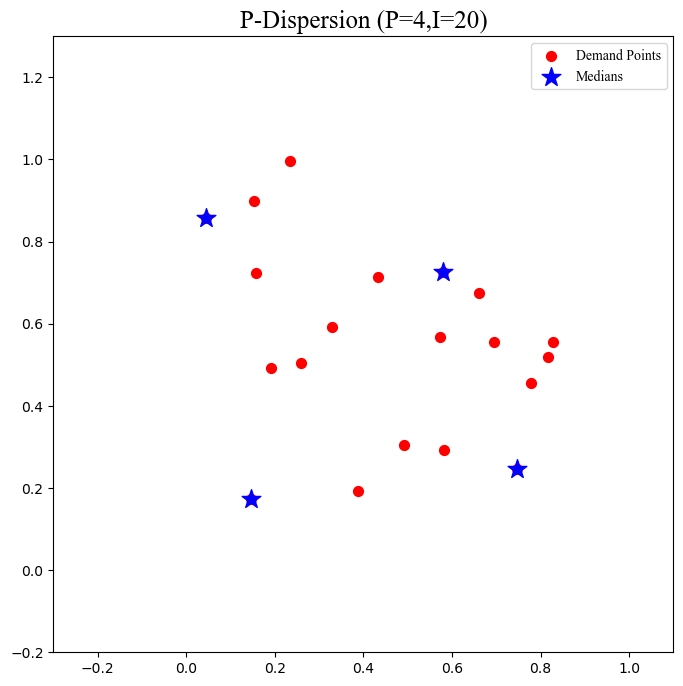

In [5]:
Visualize optimal solution#Image representation
plt.figure(figsize=(8, 8))
name = 'P-Dispersion (P=' + str(num_located) + ',I=' + str(num_points) + ')'
plt.title(name, font = 'Times New Roman', fontsize = 18)
#Points
plt.scatter(*zip(*points_np), c='Red', marker='o',s=50,label = 'Demand Points',zorder=2)   
plt.scatter(*zip(*points_np[centers]), c='Blue', marker='*',s=200, label = 'Medians', zorder=3)
plt.xlim(-0.3, 1.1)
plt.ylim(-0.2, 1.3)
# plt.grid(True)   
plt.legend(loc='best', prop='Times New Roman', fontsize = 18) 
plt.show()

### Case2. Solving p-Dispersion problem with real-world data

import `geopandas`, `geoplot` to plot the real world map.

In [3]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np
import matplotlib.pyplot as plt

We select Miyun District of Beijing the study area and read partial poi points in Miyun District.

In [4]:
%%time
region=gpd.read_file("../data/beijing/miyun/miyun.shp")
region.head(2)

CPU times: total: 15.6 ms
Wall time: 20.9 ms


,ID,geometry
0,1,"POLYGON ((116.86479 40.57630, 116.86313 40.576..."
1,2,"POLYGON ((116.97362 40.34196, 116.97298 40.342..."


In [5]:
%%time
poi = gpd.read_file("../data/beijing/miyun/miyun-poi.shp")
poi.shape[0]

CPU times: total: 0 ns
Wall time: 5 ms


17

In [6]:
def render_north_arrow(ax, x, y, size, ratio = 1):
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

Visualization of the input data by geoplot

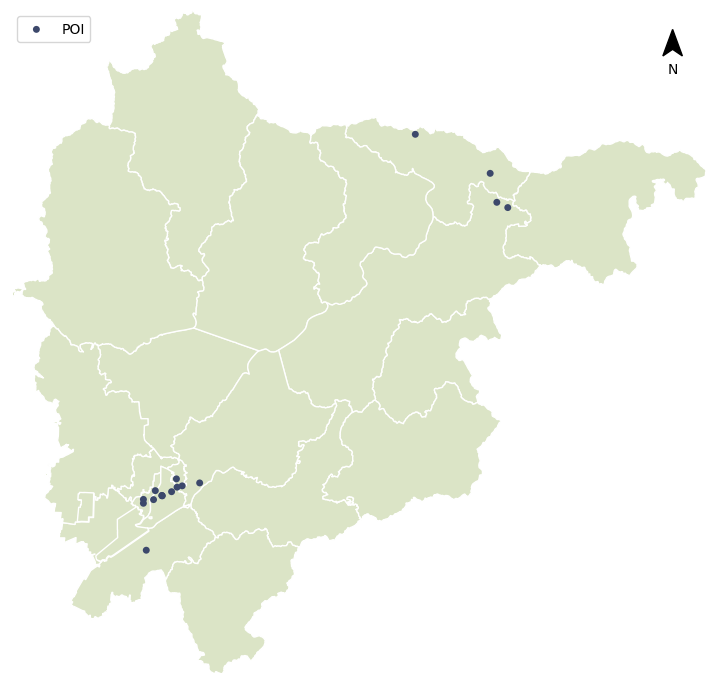

In [7]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="#DBE4C6",
                   figsize=(9, 9))
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color= '#3C486B',
               alpha=1,
               linewidth=0,
               label='POI',
               ax=ax)
plt.legend(loc='upper left')
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)

#### Solving p-Dispersion

In [8]:
data = poi[['lon', 'lat']]
num_points = poi.shape[0]
num_located = int(poi.shape[0]/5)
points = [(data['lon'][i], data['lat'][i]) for i in range(num_points)]
points_np = np.array(points)

In [9]:
centers, obj = PDispersion(num_points=num_points,
                           points=points_np,
                           solver=PULP_CBC_CMD(),
                           num_located=num_located).prob_solve()

Status: Optimal
Centers = [2, 10, 13]
Maximum minimum distance between two points =  0.13011898


prepare the LineString and center Points to plot the solution

In [10]:
center_points = poi.iloc[centers]

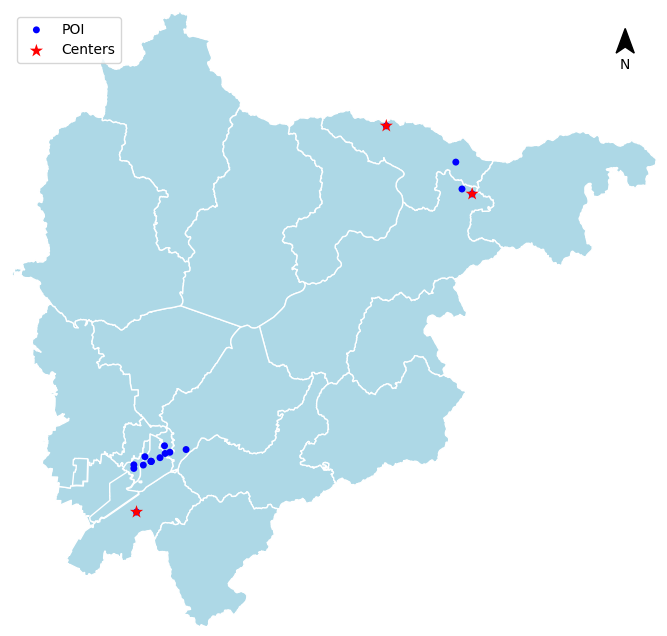

In [14]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="lightblue",
                   figsize=(10, 8))

gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='blue',
               alpha=1,
               linewidth=0,
               label='POI',
               zorder=2,
               ax=ax)
gplt.pointplot(center_points, 
               extent=region.total_bounds,
               s=10,
               color='red',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Centers',
               zorder=4,
               ax=ax)
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)
plt.legend(loc='upper left')